## Лабораторна робота №3
### Лінійна фільтрація зображень
Виконав студент групи ФІ-31 Дремко Олександр

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

Лiнiйна фiльтрацiя зображень згорткою

In [2]:
def filter(grayscale_image, kernel):

    # Отримання розмірів ядра
    kernel_h, kernel_w = kernel.shape

    # Розрахунок полів для доповнення
    high, wide = kernel_h // 2, kernel_w // 2

    # Додавання полів (заповнених нулями) до зображення
    exp_image = np.pad(grayscale_image, ((high, high), (wide, wide)), mode='constant', constant_values=0)

    # Порожній масив такого ж розміру, як оригінальне зображення, для збереження результату
    filtered_image = np.zeros_like(grayscale_image)

    # Перебір кожного пікселя оригінального зображення
    for i in range(grayscale_image.shape[0]):
        for j in range(grayscale_image.shape[1]):

            # Вибір регіону під ядро
            region = exp_image[i:i + kernel_h, j:j + kernel_w]
            
            # Розрахунок значення згортки
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image

## Використаня

Підготовка зображення

<function matplotlib.pyplot.show(close=None, block=None)>

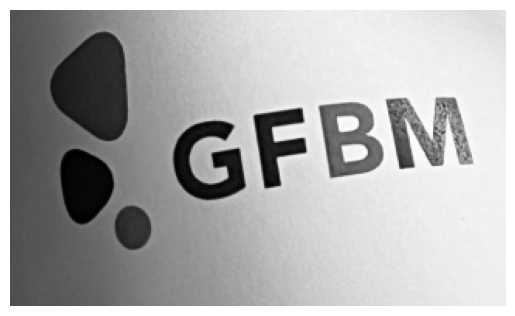

In [3]:
image_path = "obj.png"

image = cv2.imread(image_path)

# Перетворення зображення з BGR у RGB (оскільки OpenCV завантажує в форматі BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Конвертація зображення в ч/б
grayscale_image = np.dot(image[..., :3], [0.36, 0.53, 0.11]).astype(np.float32)

# Повертає зображення як numpy-масив пікселів
image_array = np.array(grayscale_image)

plt.imshow(image_array, cmap="gray")
plt.axis('off')
plt.show

1. Зсув зображення на 10 пiкселiв вправо та 20 вниз

In [4]:
def create_shift_kernel(dx, dy, kernel_size):

    # Переконуємось, що kernel_size непарний
    assert kernel_size % 2 == 1

    # Створюємо ядро і заповнюємо нулями
    kernel = np.zeros((kernel_size, kernel_size))

    # Обчислюємо центр ядра
    center_x = kernel_size // 2
    center_y = kernel_size // 2

    # Рахуємо координати зміщення
    shifted_x = center_x + dx
    shifted_y = center_y + dy

    # Переконуємось, що не виходимо за межі, і встановлюємо 1 на кординати зміщеня
    if 0 <= shifted_x < kernel_size and 0 <= shifted_y < kernel_size:
        kernel[shifted_y, shifted_x] = 1

    return kernel

<function matplotlib.pyplot.show(close=None, block=None)>

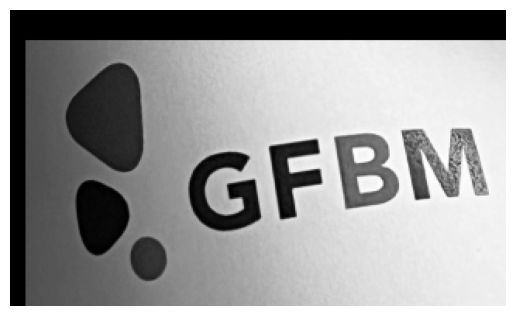

In [5]:
shifted_kernel = create_shift_kernel(-10, -20, 41)

# print(shifted_kernel)

shifted_image = filter(image_array, shifted_kernel)

plt.imshow(shifted_image, cmap="gray")
plt.axis('off')
plt.show

2. Iнверсiя

<function matplotlib.pyplot.show(close=None, block=None)>

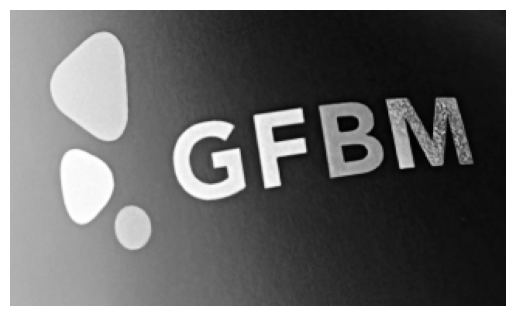

In [6]:
invert_kernel = np.array([[0, 0, 0],
                          [0, -1, 0],
                          [0, 0, 0]])

filtered_image = filter(image_array, invert_kernel)

inverted_image = 255 + filtered_image

plt.imshow(inverted_image, cmap="gray")
plt.axis('off')
plt.show

3. Згладжування по Гауссу (розмiр фiльтра не менше 11х11)

In [7]:
def create_gaussian_kernel(size, sigma):
    # Оголошення осі координат
    ax = np.linspace(-(size // 2), size // 2, size)

    # Побудова координатної сітки
    xx, yy = np.meshgrid(ax, ax)

    # Обчислення ядра Гаусса
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    
    return kernel / np.sum(kernel)

<function matplotlib.pyplot.show(close=None, block=None)>

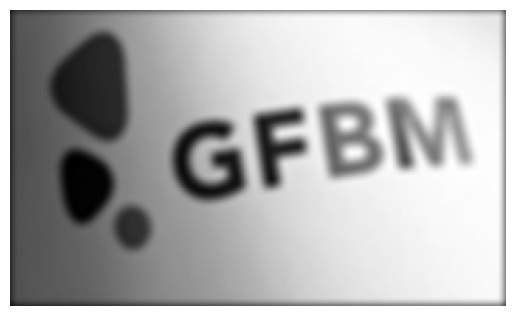

In [8]:
gaussian_kernel = create_gaussian_kernel(11, 3)

gaussian_image = filter(image_array, gaussian_kernel)

plt.imshow(gaussian_image, cmap="gray")
plt.axis('off')
plt.show

4. Розмиття "рух по дiагоналi" (розмiр фiльтра не менше 7х7)

<function matplotlib.pyplot.show(close=None, block=None)>

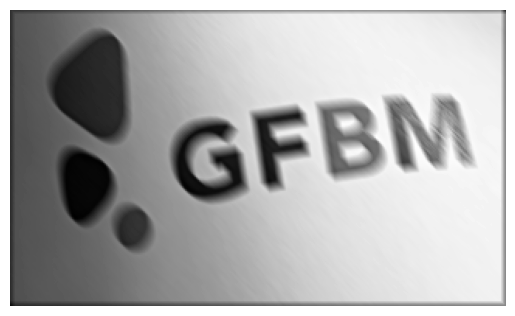

In [9]:
motion_blur_kernel = np.eye(7) / 7

motion_blurred_image = filter(image_array, motion_blur_kernel)

plt.imshow(motion_blurred_image, cmap="gray")
plt.axis('off')
plt.show

5. Пiдвищення рiзкостi

<function matplotlib.pyplot.show(close=None, block=None)>

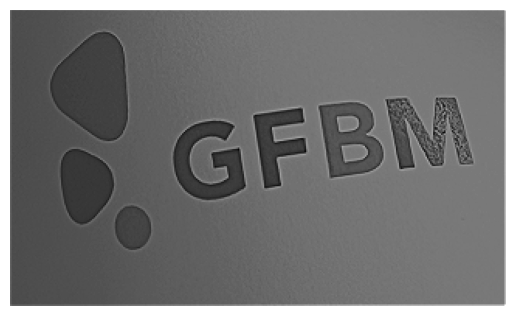

In [10]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_image = filter(image_array, sharpen_kernel)

plt.imshow(sharpened_image, cmap="gray")
plt.axis('off')
plt.show

6. Фiльтр Собеля (вертикальний)

<function matplotlib.pyplot.show(close=None, block=None)>

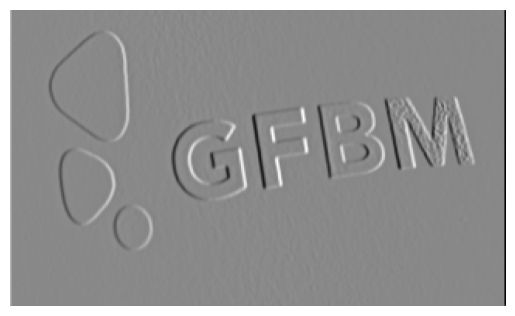

In [11]:
sobel_kernel = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

sobel_image = filter(image_array, sobel_kernel)

plt.imshow(sobel_image, cmap="gray")
plt.axis('off')
plt.show

7. Фiльтр границi

<function matplotlib.pyplot.show(close=None, block=None)>

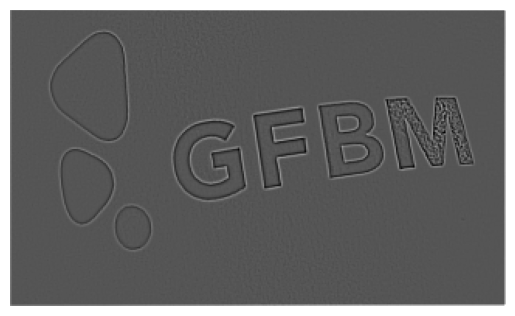

In [12]:
edge_kernel = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])

edges_image = filter(image_array, edge_kernel)

plt.imshow(edges_image, cmap="gray")
plt.axis('off')
plt.show

8. Фільтр Дремка

<function matplotlib.pyplot.show(close=None, block=None)>

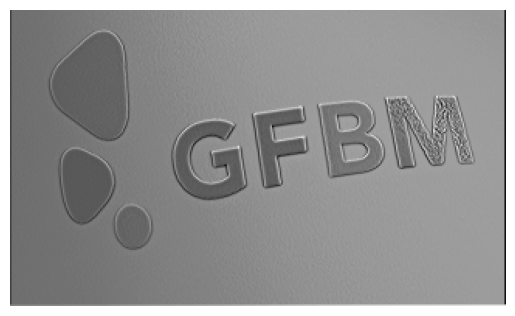

In [13]:
dremko_kernel = np.array([[0,0,0],
                          [0,2,0],
                          [2,-5,2]])

dremko_image = filter(image_array, dremko_kernel)

plt.imshow(dremko_image, cmap="gray")
plt.axis('off')
plt.show